In [2]:
import glrm

In [3]:
from numpy import sqrt, repeat, tile, hstack, array, zeros, ones, sqrt, diag, asarray, hstack, vstack, split, cumsum, sign
from numpy.random import randn
m, n1, n2, k = 50, 25, 25, 5
eta = 0.1 # noise
A = randn(m,k).dot(randn(k,n1+n2)) + eta*randn(m,n1+n2)
A_bool = sign(A[:,:n1]) # Boolean data must be labeled as -1, 1
A_real = A[:,n1:]

In [4]:
print(A_bool.shape)
print(A_bool)
print("")
print(A_real.shape)
print(A_real)

(50, 25)
[[ 1. -1. -1. ... -1.  1.  1.]
 [ 1. -1. -1. ...  1.  1.  1.]
 [-1.  1.  1. ... -1. -1. -1.]
 ...
 [-1. -1. -1. ...  1.  1. -1.]
 [ 1.  1. -1. ... -1.  1.  1.]
 [-1.  1.  1. ... -1. -1.  1.]]

(50, 25)
[[-4.60013256  0.2022719  -3.91943423 ...  3.08124543  0.745113
   4.65228518]
 [-0.91786179 -0.10293574 -1.74880153 ... -1.13824056 -1.69716651
   3.09819814]
 [ 1.79272599 -0.6153023   3.46835308 ... -0.2526714   0.131639
  -3.23958505]
 ...
 [ 3.93384495  1.97883986  0.423162   ... -4.30842519 -0.59963258
   2.47625082]
 [-1.46863704  0.4318636  -0.72135667 ...  1.14823984  0.52782214
   1.23053332]
 [-1.3487446  -2.38297517  1.58781587 ...  0.2652316  -2.49931537
  -0.29039799]]


In [5]:

print(glrm.__file__)


d:\SummerResearch\summer_research\Lib\site-packages\glrm-0.0.1-py3.11.egg\glrm\__init__.py


In [6]:
from glrm.loss import QuadraticLoss, HingeLoss
A_list      = [A_bool, A_real]
loss_list   = [HingeLoss, QuadraticLoss]

from glrm.reg import QuadraticReg
regX, regY = QuadraticReg(0.1), QuadraticReg(0.1)

In [7]:
print(regX)
print(regY)

quadratic reg
quadratic reg


In [8]:
missing1     = [(48, 23), (49, 23), (48, 24), (49, 24), \
                    (48, 22), (49, 21), (48, 21), (49, 22)]
missing2     = [(23, 0), (23, 1), (24, 0), (24, 1), \
                (25, 0), (25, 1), (26, 0), (26, 1)]
missing_list = [missing1, missing2]

In [9]:
from glrm.convergence import Convergence
c = Convergence(TOL = 1e-3, max_iters = 1000)

In [10]:
from glrm.glrm import GLRM

In [23]:
model = GLRM(A_list, loss_list, regX, regY, k=10, missing_list=missing_list, converge = c)
# model = GLRM(A_list, loss_list, regX, regY, k, converge = c)
model.fit()

d:\SummerResearch\summer_research\Lib\site-packages\cvxpy\expressions\expression.py:667: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 7 times so far.

  warnings.warn(msg, UserWarning)
d:\SummerResearch\summer_research\Lib\site-packages\cvxpy\expressions\expression.py:667: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 8 times so far.

  warnings.warn(msg, UserWarning)
d:

(array([[-6.14857585,  1.41825171,  0.65471198, -0.27316646,  2.02554837,
         -0.4668293 , -0.28080522,  0.70183412, -0.01090517,  0.27768743,
          1.        ],
        [-0.38414709,  2.6618402 ,  1.40999355, -2.70127344,  0.31048919,
          0.08598293,  0.2059489 ,  0.0758828 ,  1.40693012,  0.11882146,
          1.        ],
        [ 1.65449475, -2.37029953,  0.30930194,  0.17359171, -2.03493912,
         -0.63276977, -0.74448856, -0.52782104, -1.06930783,  0.09229752,
          1.        ],
        [ 2.40634807,  3.36265282, -0.98553273,  0.68824796,  0.4978731 ,
          0.87132539,  0.58547094, -0.82734676, -0.24348762,  0.0533731 ,
          1.        ],
        [-1.37946049, -2.0404634 , -1.08892287, -1.24762685, -1.28870326,
          1.04334502,  0.04972965, -0.45478381, -0.64966201, -0.69988957,
          1.        ],
        [ 4.5217609 ,  1.16401444,  0.08158353,  2.47442934, -1.09516444,
         -0.12027206,  0.31664469, -0.60391725,  1.15651977,  0.7113667

In [24]:
from numpy.linalg import norm
X, Y = model.factors()
A_hat = model.predict() # a horizontally concatenated matrix, not a list
reconstruction_error =  norm(A_hat - hstack(A_list)) # by hand
reconstruction_error

5.859614911075528

In [25]:
original_magnitude = norm(hstack(A_list))
print(original_magnitude)
relative_error = reconstruction_error / original_magnitude

# Information captured
information_captured = 1 - relative_error 
information_captured


85.93790799673157


0.9318157138372698

In [13]:
X.shape, Y.shape, A_hat.shape

((50, 3), (3, 50), (50, 50))

In [14]:
Y

array([[-9.09472015e-01, -1.51224087e-01,  6.21265307e-01,
        -4.30014362e-01,  7.99216893e-01, -3.29917417e-04,
         3.46756404e-01,  1.88575107e+00,  2.45656060e-01,
         8.44843442e-04, -1.33951576e+00, -8.54373494e-02,
         3.48631573e+00,  1.69031609e+00,  2.11546698e-01,
         1.25956306e+00, -9.34917386e-01,  2.55529569e+00,
         1.00505034e+00, -1.49990461e+00,  2.21386622e-01,
        -1.18379587e+00,  8.01716271e-01, -2.24817056e-01,
        -1.20583232e+00,  8.27247167e-02,  9.01984322e-03,
         7.67274456e-02,  2.87852009e-02, -4.70791730e-02,
         8.53950117e-02,  1.26643669e-01, -1.60396547e-03,
        -4.64897374e-02, -2.40586906e-02, -1.79566770e-02,
        -2.22437322e-01, -1.96244004e-02, -2.38174109e-02,
        -3.72201779e-02,  1.37336758e-01, -8.96621601e-02,
        -1.58609732e-01,  3.01950516e-02,  2.28633708e-02,
         2.24997869e-02,  4.35531381e-02, -2.63771085e-02,
         1.82273229e-03, -2.80899412e-02],
       [ 9.83

In [15]:
A_hat

array([[ 1.        , -1.        , -1.        , ...,  0.35669245,
         0.33521371, -0.133297  ],
       [ 1.        , -1.        , -1.        , ...,  0.28932046,
         0.34082214, -0.18902143],
       [-1.        ,  1.        ,  1.        , ...,  0.29542608,
         0.33414713, -0.28766775],
       ...,
       [-1.        , -1.        ,  1.        , ...,  0.21993307,
         0.34616526, -0.25369543],
       [ 1.        ,  1.        , -1.        , ...,  0.36308321,
         0.330324  , -0.20128765],
       [ 1.        ,  1.        , -1.        , ...,  0.34950614,
         0.3314495 , -0.21259711]])

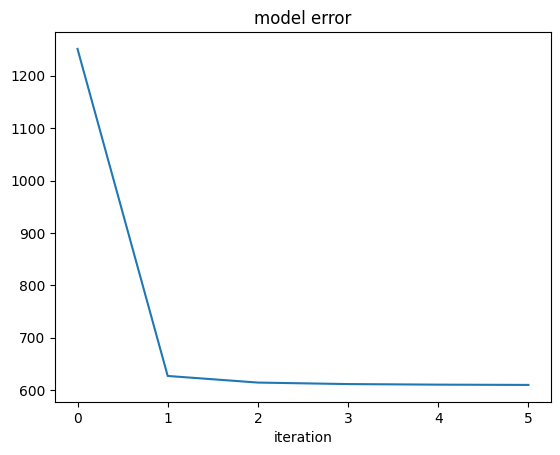

In [16]:
ch = model.convergence() # grab convergence history of alt min problem
ch.plot() # view convergence of objective

In [17]:
from glrm.loss import QuadraticLoss, HingeLoss, OrdinalLoss
from glrm.reg import QuadraticReg
from glrm.glrm import GLRM
from glrm.convergence import Convergence
from glrm.util import pplot #, unroll_missing
from numpy.random import randn, choice, seed
from itertools import product
from numpy import sign, ceil, hstack
seed(1)

# Generate problem data
m, k = 50, 10
n1 = 25 # cols of numerical data
n2 = 10 # cols of ordinal data
n3 = 25 # cols of boolean data
n = n1+n2+n3
data = randn(m,k).dot(randn(k,n))
data_real = data[:,:n1] # numerical data
data_ord = data[:,n1:n1+n2] 
data_ord = data_ord - data_ord.min()
data_ord = (data_ord/data_ord.max()*6 + 1).round()# ordinal data, e.g., Likert scale
data_bool = sign(data[:,n1+n2:])

# Initialize model
A = [data_real, data_ord, data_bool]
loss = [QuadraticLoss, OrdinalLoss, HingeLoss]
regX, regY = QuadraticReg(0.01), QuadraticReg(0.01)
converge = Convergence(TOL = 1e-2, max_iters = 1000) # optional (default TOL = 1e-3)
glrm_mix = GLRM(A, loss, regX, regY, k, converge = converge)

# Fit
glrm_mix.fit()

# Results
X, Y = glrm_mix.factors()
A_hat = glrm_mix.predict() # glrm_pca.predict(X, Y) works too; returns decode(XY)
ch = glrm_mix.convergence() # convergence history
pplot([hstack(A), A_hat, hstack(A)-A_hat], ["original", "glrm", "error"])

# Now with missing data
missing = [list(product(range(35, 50), range(n1-5, n1))), list(product(range(35,
    50), range(0, n2))), list(product(range(35, 50), range(0, n3-5)))]

glrm_mix_missing = GLRM(A, loss, regX, regY, k, missing)
glrm_mix_missing.fit()
A_hat = glrm_mix_missing.predict()

# # translate missing list into something that we can plot
# new_missing = unroll_missing(missing, [n1, n2, n3]) 
# pplot([hstack(A), new_missing, A_hat, hstack(A)-A_hat], ["original", "missing", "glrm", "error"])

AttributeError: module 'cvxpy' has no attribute 'sum_entries'